# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

We would need to dummify the categorical data: species, island, and sex

In [45]:
#import Palmer Penguins dataset
import pandas as pd
penguins = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [46]:
# Dummify the categorical variables
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

# Print the first few rows of the dummified dataset
print(penguins_dummified.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
3             NaN            NaN                NaN          NaN   
4            36.7           19.3              193.0       3450.0   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_MALE  
0              False           False         False              True      True  
1              False           False         False              True     False  
2              False           False         False              True     False  
3              False           False         False              True     False  
4              False           False         False              True     False  


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [48]:
# Drop rows with missing values
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

In [49]:
# Prepare feature (X) and target (y) variables
X = penguins[['bill_length_mm']].copy()  # Copying to avoid warnings
y = penguins['bill_depth_mm']

# Add polynomial terms to X up to the 10th degree
for degree in range(2, 11):
    X[f'x_pow_{degree}'] = X['bill_length_mm'] ** degree

In [50]:
# Fit polynomial models
linear_model = LinearRegression().fit(X[['bill_length_mm']], y)
quad_model = LinearRegression().fit(X[['bill_length_mm', 'x_pow_2']], y)
cubic_model = LinearRegression().fit(X[['bill_length_mm', 'x_pow_2', 'x_pow_3']], y)
degree_10_model = LinearRegression().fit(X, y)

# Create a range of values for bill_length_mm to plot predictions
X_range = pd.DataFrame({'bill_length_mm': np.linspace(X['bill_length_mm'].min(), X['bill_length_mm'].max(), 100)})
for degree in range(2, 11):
    X_range[f'x_pow_{degree}'] = X_range['bill_length_mm'] ** degree

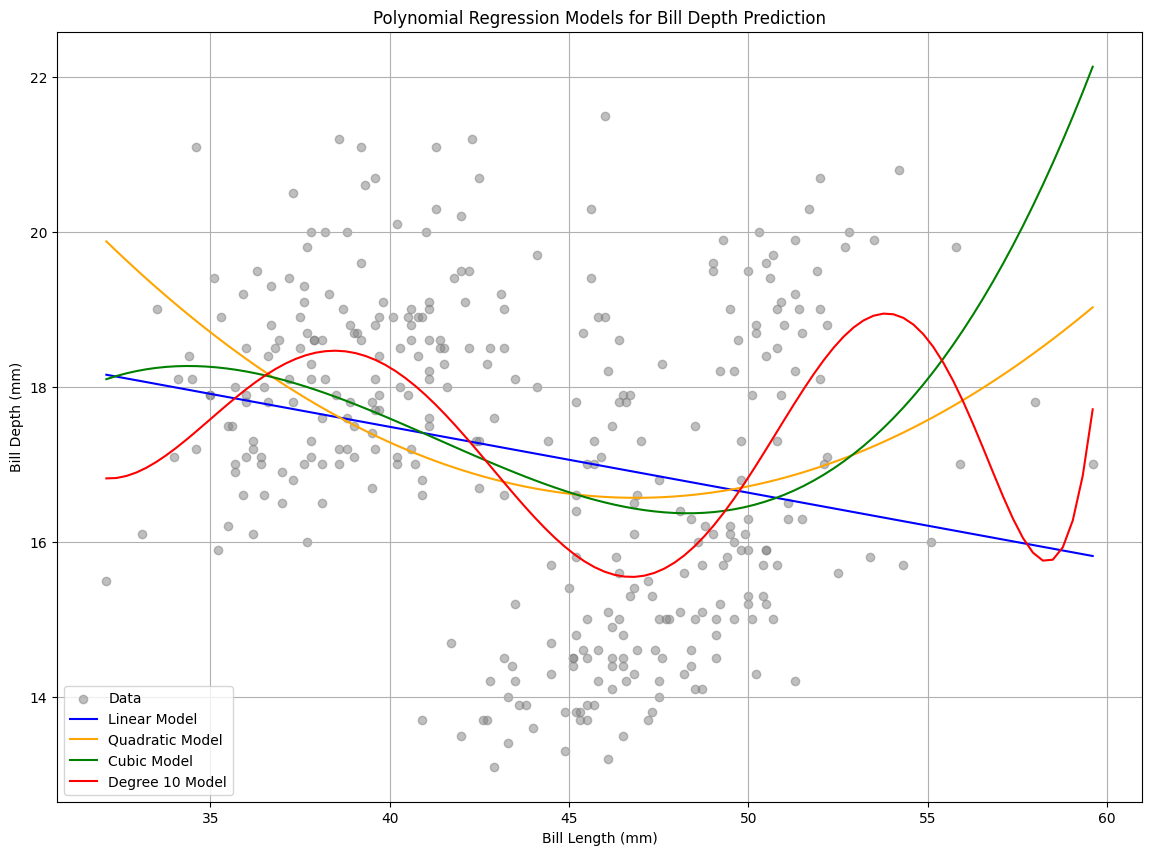

In [51]:
# Scatter plot of the original data
plt.figure(figsize=(14, 10))
plt.scatter(X['bill_length_mm'], y, color='gray', label='Data', alpha=0.5)

# Plot predictions for each model
plt.plot(X_range['bill_length_mm'], linear_model.predict(X_range[['bill_length_mm']]), color='blue', label='Linear Model')
plt.plot(X_range['bill_length_mm'], quad_model.predict(X_range[['bill_length_mm', 'x_pow_2']]), color='orange', label='Quadratic Model')
plt.plot(X_range['bill_length_mm'], cubic_model.predict(X_range[['bill_length_mm', 'x_pow_2', 'x_pow_3']]), color='green', label='Cubic Model')
plt.plot(X_range['bill_length_mm'], degree_10_model.predict(X_range), color='red', label='Degree 10 Model')

# Add titles and labels
plt.title('Polynomial Regression Models for Bill Depth Prediction')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.grid(True)
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The Linear Model is underfiiting the data. I can tell because it does not follow the trend of the data points.

The Degree 10 polynomial model is overfitting the data. I can tell because it has excessive fluctuations.

The model that I think fits the data the best is Quadratic Model as it follows the trend of the data the most closely out of all of them without excessively fluctuating like Degree 10 polynomial and without not really following the trend of the data like the linear model.